In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [7]:
df = pd.read_csv("sunrise_2025.csv")

df['date'] = pd.to_datetime(df['date'])
time_cols = ['sunrise', 'sunset', 'nautical_twilight_begin', 'civil_twilight_begin']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], utc=True).dt.tz_convert("Europe/Warsaw")
df.head()

,date,sunrise,sunset,nautical_twilight_begin,civil_twilight_begin,day_length
0,2025-01-01,2025-01-01 08:03:21+01:00,2025-01-01 15:34:52+01:00,2025-01-01 06:35:45+01:00,2025-01-01 07:22:00+01:00,27091
1,2025-01-02,2025-01-02 08:03:07+01:00,2025-01-02 15:36:02+01:00,2025-01-02 06:35:40+01:00,2025-01-02 07:21:52+01:00,27175
2,2025-01-03,2025-01-03 08:02:50+01:00,2025-01-03 15:37:15+01:00,2025-01-03 06:35:33+01:00,2025-01-03 07:21:40+01:00,27265
3,2025-01-04,2025-01-04 08:02:28+01:00,2025-01-04 15:38:31+01:00,2025-01-04 06:35:22+01:00,2025-01-04 07:21:25+01:00,27363
4,2025-01-05,2025-01-05 08:02:03+01:00,2025-01-05 15:39:49+01:00,2025-01-05 06:35:08+01:00,2025-01-05 07:21:06+01:00,27466


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype                        
---  ------                   --------------  -----                        
 0   date                     365 non-null    datetime64[ns]               
 1   sunrise                  365 non-null    datetime64[ns, Europe/Warsaw]
 2   sunset                   365 non-null    datetime64[ns, Europe/Warsaw]
 3   nautical_twilight_begin  365 non-null    datetime64[ns, Europe/Warsaw]
 4   civil_twilight_begin     365 non-null    datetime64[ns, Europe/Warsaw]
 5   day_length               365 non-null    int64                        
dtypes: datetime64[ns, Europe/Warsaw](4), datetime64[ns](1), int64(1)
memory usage: 17.2 KB


In [25]:
df['nautical_hour'] = (
    df['nautical_twilight_begin'].dt.hour +
    df['nautical_twilight_begin'].dt.minute / 60 +
    df['nautical_twilight_begin'].dt.second / 3600
)

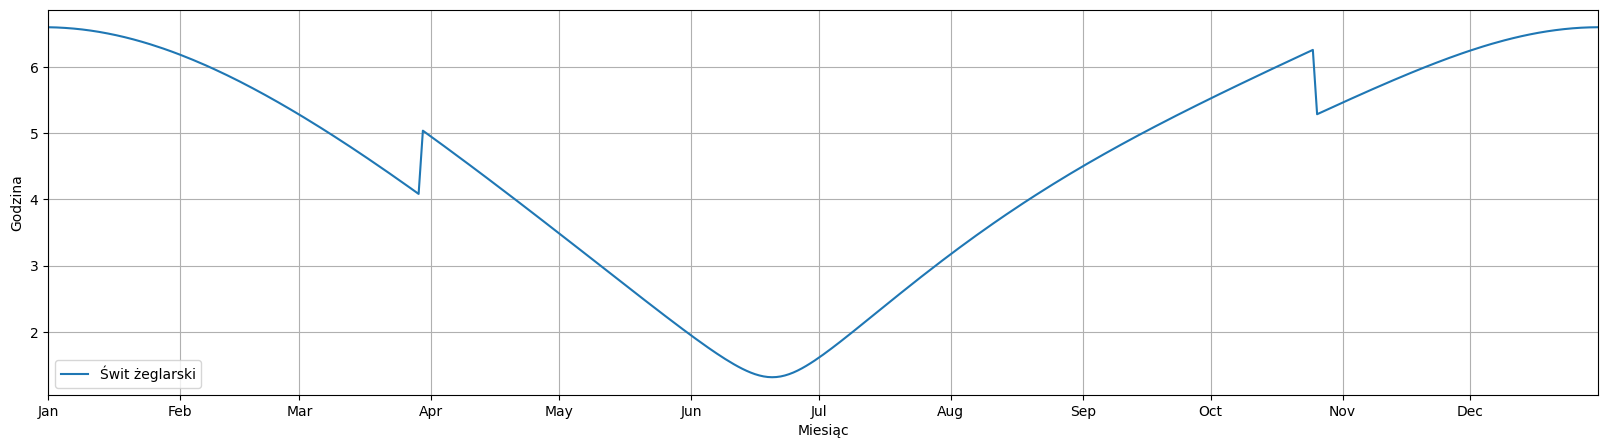

In [49]:
x = df['date']
y = df['nautical_hour']
plt.figure(figsize=(20,5))
plt.plot(x, y, label='Świt żeglarski')

plt.xlim(df['date'].min(), df['date'].max())
plt.grid()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.legend()
plt.xlabel('Miesiąc')
plt.ylabel('Godzina')

plt.show()

In [43]:
df.tail()

,date,sunrise,sunset,nautical_twilight_begin,civil_twilight_begin,day_length,nautical_hour
360,2025-12-27,2025-12-27 08:03:33+01:00,2025-12-27 15:29:37+01:00,2025-12-27 06:35:19+01:00,2025-12-27 07:21:50+01:00,26764,6.588611
361,2025-12-28,2025-12-28 08:03:38+01:00,2025-12-28 15:30:30+01:00,2025-12-28 06:35:30+01:00,2025-12-28 07:21:59+01:00,26812,6.591667
362,2025-12-29,2025-12-29 08:03:41+01:00,2025-12-29 15:31:27+01:00,2025-12-29 06:35:38+01:00,2025-12-29 07:22:05+01:00,26866,6.593889
363,2025-12-30,2025-12-30 08:03:39+01:00,2025-12-30 15:32:26+01:00,2025-12-30 06:35:44+01:00,2025-12-30 07:22:07+01:00,26927,6.595556
364,2025-12-31,2025-12-31 08:03:33+01:00,2025-12-31 15:33:29+01:00,2025-12-31 06:35:46+01:00,2025-12-31 07:22:06+01:00,26996,6.596111
